# Loading and Plotting Data
 
First, we will use only two features from the data set: alcohol and ash (We can plot the solution in 2D space). The labels are supplied as an array of data with values from 1 to 3, but at first, we want a simple binary regression problem with a yes or no answer.  

We filter the data set, reducing it to only include wines with labels 1 or 2.  

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
data = pd.read_csv('data.txt')

In [28]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
reduced = data[data['class'] <= 2]
X = reduced.as_matrix(columns=['alcohol', 'ash'])
y = label_binarize(reduced['class'].values, [1, 2])[:,0]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [30]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
print('Train:', len(Xtrain), '| Test:', len(Xtest))

Train: 97 | Test: 33


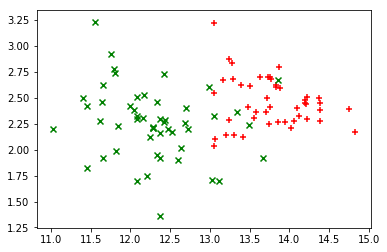

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(Xtrain, ytrain)

We can see that we can plot line that could divide the two colored points with a small amount of error.

# Logistic Regression

To implement logistic regression, we need to define the cost function $J(\theta)$, and compute the partial derivatives of $J(\theta)$. As we have seen previously:

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$


where $f_\theta(x)$ is the logistic function

$$
f_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$
The partiel derivatives of $f_\theta(x)$ : 
$$
\frac{df_\theta(x)}{d\theta} = f_\theta(x)(1 - f_\theta(x))x
$$

Another way to write the cost function $J(\theta)$ in order to handle the problem when $f_\theta(x) = 1$ and then avoid $log (1 - 1) = log(0)$ is:
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i}))
$$
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(\frac{1}{1 + e^{-\theta^Tx^{i}}})+(1-y^{i})\log(1-\frac{1}{1 + e^{-\theta^Tx^{i}}})
$$
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}(\log(1) - \log({1 + e^{-\theta^Tx^{i}}}))+(1-y^{i})\log(\frac{1 + e^{-\theta^Tx^{i}} - 1}{1 + e^{-\theta^Tx^{i}}})
$$
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log({1 + e^{-\theta^Tx^{i}}})+(1-y^{i})(\log(e^{-\theta^Tx^{i}}) - \log({1 + e^{-\theta^Tx^{i}}}))
$$
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log({1 + e^{-\theta^Tx^{i}}})+(1-y^{i})(-\theta^Tx^{i} - \log({1 + e^{-\theta^Tx^{i}}}))
$$
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log({1 + e^{-\theta^Tx^{i}}})-\theta^Tx^{i} - \log({1 + e^{-\theta^Tx^{i}}}) + y^{i}\theta^Tx^{i} + y^{i}\log({1 + e^{-\theta^Tx^{i}}})
$$

So : 

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}-\theta^Tx^{i} - \log({1 + e^{-\theta^Tx^{i}}}) + y^{i}\theta^Tx^{i}
$$

$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}(y^{i} - 1)(\theta^Tx^{i}) - \log({1 + e^{-\theta^Tx^{i}}})
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?


$$
\frac{dJ(\theta)}{d\theta} = \frac{d(-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))+(1-y^{i})\log(1-f_\theta(x^{i})))}{d\theta}
$$
$$
\frac{dJ(\theta)}{d\theta} = -\frac{1}{N}\sum_{i=1}^{N} y^{i}\frac{d(\log(f_\theta(x^{i})))}{d\theta} + (1-y^{i})\frac{d(\log(1-f_\theta(x^{i})))}{d\theta}
$$
$$
\frac{dJ(\theta)}{d\theta} = -\frac{1}{N}\sum_{i=1}^{N} y^{i}\frac{f_\theta(x^{i})(1 - f_\theta(x^{i}))x^{i}}{f_\theta(x^{i})} + (1-y^{i})\frac{-f_\theta(x^{i})(1 - f_\theta(x^{i}))x^{i}}{(1 - f_\theta(x^{i}))}
$$
$$
\frac{dJ(\theta)}{d\theta} = -\frac{1}{N}\sum_{i=1}^{N} y^{i}(1 - f_\theta(x^{i}))x^{i}+ (1-y^{i})(-f_\theta(x^{i}))x^{i}
$$

$$
\frac{dJ(\theta)}{d\theta} = -\frac{1}{N}\sum_{i=1}^{N} y^{i}x^{i} - y^{i}x^{i}f_\theta(x^{i}) - f_\theta(x^{i})x^{i} + y^{i}x^{i}f_\theta(x^{i})
$$


$$
\frac{dJ(\theta)}{d\theta} = -\frac{1}{N}\sum_{i=1}^{N} (y^{i}- f_\theta(x^{i}))x^{i}
$$


$$
\frac{dJ(\theta)}{d\theta} = \frac{1}{N}\sum_{i=1}^N (f_\theta(x^i) - y^i)x^i
$$

- Write a function LogRegTrain(x, y, num_epochs, learning_rate = 0.01) which compute $\theta$ that minimize $J(\theta)$

In [32]:
def sigmoid(w, x):
    return 1 / (1 + np.exp(-x.dot(w)))

def cost_function(wx, y):
    return -1/len(y) * np.sum(((y - 1) * wx) - np.log(1 + np.exp(-wx))) 

def LogRegTrain(x, y, num_epochs, learning_rate):
    N = x.shape[0]
    x = np.c_[np.ones((N, 1)), x]
    y = y.reshape((-1, 1))
    w = np.zeros((x.shape[1], 1))
    for i in range(num_epochs + 1):
        yhat = sigmoid(w, x)
        cost = cost_function(x @ w, y)
        error = yhat.reshape((-1,1)) - y.reshape((-1,1))
        if i % 1000 == 0:
            print('Iteration:', i, '| Error -LLK:', cost, '| Error MSE :', np.linalg.norm(error))
        dj = (x.T @ error) / N
        w = w - learning_rate * dj    
    return w

def LogRegTrainNewton(x, y, precision = 0.0001):
    N = x.shape[0]
    x = np.c_[np.ones((N, 1)), x]
    y = y.reshape((N, 1))
    w = np.zeros((x.shape[1], 1))   
    diff = precision + 1
    i = 0
    while diff > precision:
        yhat = sigmoid(w, x)
        cost = cost_function(x @ w, y)
        error = yhat.reshape((-1,1)) - y.reshape((-1,1))
        dj = (x.T @ error) / N
        hessian = (x.T @ np.diag((yhat * (1 - yhat)).reshape(-1)) @ x)/N
        delta = np.linalg.inv(hessian) @ dj
        w = w - delta
        diff = np.linalg.norm(delta)
        print('Iteration:', i, '| Error -LLK:', cost, '| Error MSE :', np.linalg.norm(error), '| Error norm delta :', np.linalg.norm(delta))
        i = i + 1
    return w

In [33]:
W = LogRegTrain(Xtrain, ytrain, 100000, 0.01)
print("W:", W)

Iteration: 0 | Error -LLK: 0.6931471805599453 | Error MSE : 4.924428900898052
Iteration: 1000 | Error -LLK: 0.6832027370690853 | Error MSE : 4.875242119829449
Iteration: 2000 | Error -LLK: 0.6745629816766832 | Error MSE : 4.832228219536175
Iteration: 3000 | Error -LLK: 0.6667437280939081 | Error MSE : 4.793115755019282
Iteration: 4000 | Error -LLK: 0.6594645428274758 | Error MSE : 4.756546535531211
Iteration: 5000 | Error -LLK: 0.6525593245990358 | Error MSE : 4.721699694899815
Iteration: 6000 | Error -LLK: 0.6459289410233201 | Error MSE : 4.688079395605734
Iteration: 7000 | Error -LLK: 0.6395135473553352 | Error MSE : 4.655385089975071
Iteration: 8000 | Error -LLK: 0.6332764436354976 | Error MSE : 4.623433711689141
Iteration: 9000 | Error -LLK: 0.6271946339209167 | Error MSE : 4.592113157336444
Iteration: 10000 | Error -LLK: 0.62125327889965 | Error MSE : 4.5613543677848725
Iteration: 11000 | Error -LLK: 0.6154424196852684 | Error MSE : 4.531114463742327
Iteration: 12000 | Error -LLK:

In [34]:
W_newton = LogRegTrainNewton(Xtrain, ytrain)
print("W_newton:", W_newton)

Iteration: 0 | Error -LLK: 0.6931471805599453 | Error MSE : 4.924428900898052 | Error norm delta : 25.640759996384478
Iteration: 1 | Error -LLK: 0.28971872300943163 | Error MSE : 2.7249480509048896 | Error norm delta : 16.38412481528904
Iteration: 2 | Error -LLK: 0.21705770117762085 | Error MSE : 2.4049919967229108 | Error norm delta : 13.209899680229231
Iteration: 3 | Error -LLK: 0.1976869930945414 | Error MSE : 2.354400195799722 | Error norm delta : 7.6807991095903905
Iteration: 4 | Error -LLK: 0.19454212015439637 | Error MSE : 2.356586670726222 | Error norm delta : 2.1310215014949323
Iteration: 5 | Error -LLK: 0.19438675401112557 | Error MSE : 2.3595435754208136 | Error norm delta : 0.13624037548236773
Iteration: 6 | Error -LLK: 0.19438618998159088 | Error MSE : 2.359768068836964 | Error norm delta : 0.0005259364409620825
Iteration: 7 | Error -LLK: 0.1943861899731649 | Error MSE : 2.359768960654419 | Error norm delta : 7.87392440651356e-09
W_newton: [[64.96856061]
 [-4.4716285 ]
 [-

- Plot the boundary and checks that it is linear? 

In [35]:
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

def predict(X, theta):
    X = np.c_[np.ones((len(X), 1)), X]
    return (sigmoid(theta, X) >= 0.5).astype(int)

def plot_boundary(X, pred, title):
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    xs, ys = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)
    plt.contour(xs, ys, zs, colors='black')
    plt.title(title)

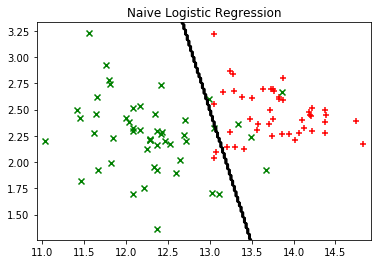

In [36]:
plot_boundary(Xtrain, lambda x: predict(x, W), "Naive Logistic Regression")
plot_points(Xtrain, ytrain)

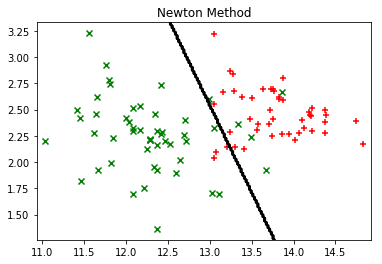

In [37]:
plot_boundary(Xtrain, lambda x: predict(x, W_newton), "Newton Method")
plot_points(Xtrain, ytrain)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictions = predict(Xtest, W)
print("Prediction with naive logistic regression")
print(' Accuracy:', accuracy_score(ytest, predictions))
print(' Precision:', precision_score(ytest, predictions, average='macro'))
print(' Recall:', recall_score(ytest, predictions, average='macro'))
print("--")
predictions = predict(Xtest, W_newton)
print("Prediction with newthod method")
print(' Accuracy:', accuracy_score(ytest, predictions))
print(' Precision:', precision_score(ytest, predictions, average='macro'))
print(' Recall:', recall_score(ytest, predictions, average='macro'))

Prediction with naive logistic regression
 Accuracy: 0.9090909090909091
 Precision: 0.9347826086956521
 Recall: 0.8846153846153846
--
Prediction with newthod method
 Accuracy: 0.9090909090909091
 Precision: 0.9347826086956521
 Recall: 0.8846153846153846


- How can we obtain a quadratic boundary? check it?

In [39]:
def transform(x):
    return np.c_[x[:, 0], x[:, 1], x[:, 0] ** 2, x[:, 1] ** 2, x[:, 0] * x[:,1]]

In [40]:
W = LogRegTrainNewton(transform(Xtrain), ytrain)
print(W)

Iteration: 0 | Error -LLK: 0.6931471805599453 | Error MSE : 4.924428900898052 | Error norm delta : 19.918126803144013
Iteration: 1 | Error -LLK: 0.28563325114563526 | Error MSE : 2.6983259371069925 | Error norm delta : 32.06910555865539
Iteration: 2 | Error -LLK: 0.21653718121818605 | Error MSE : 2.3910912776890045 | Error norm delta : 96.58882530816341
Iteration: 3 | Error -LLK: 0.19457678427785213 | Error MSE : 2.322125803095353 | Error norm delta : 167.92676098227204
Iteration: 4 | Error -LLK: 0.18623233637120404 | Error MSE : 2.2995139703254015 | Error norm delta : 102.56093835185254
Iteration: 5 | Error -LLK: 0.18399884965346247 | Error MSE : 2.2952313082228626 | Error norm delta : 31.331873695510097
Iteration: 6 | Error -LLK: 0.18381009995814343 | Error MSE : 2.297305431122873 | Error norm delta : 3.42305228855617
Iteration: 7 | Error -LLK: 0.18380840673428805 | Error MSE : 2.297655700838305 | Error norm delta : 0.03372069576797043
Iteration: 8 | Error -LLK: 0.18380840658078887 |

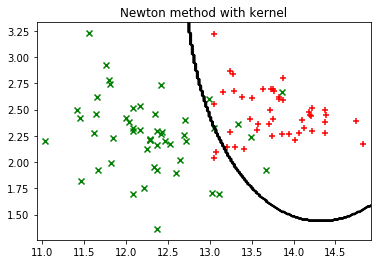

In [41]:
plot_points(Xtrain, ytrain)
plot_boundary(Xtrain, lambda x: predict(transform(x), W), "Newton method with kernel")

In [42]:
predictions = predict(transform(Xtest), W)
print("Prediction with kernel and newton method")
print('Accuracy:', accuracy_score(ytest, predictions))
print('Precision:', precision_score(ytest, predictions, average='macro'))
print('Recall:', recall_score(ytest, predictions, average='macro'))

Prediction with kernel and newton method
Accuracy: 0.9393939393939394
Precision: 0.9545454545454546
Recall: 0.9230769230769231


# Multinomial Logistic Regression

The next step is something more interesting: we use a similar set of two features from the data set (this time alcohol and flavanoids), but with all three labels instead of two.

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


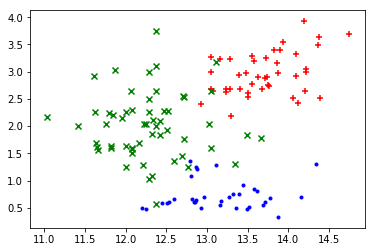

In [43]:
X = data.as_matrix(columns=['alcohol', 'flavanoids'])
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
ytrain = label_binarize(ytrain, [1, 2, 3])
plot_points(Xtrain, ytrain.argmax(axis=1))

The plotted data points again suggest some obvious linear boundaries between the three classes.

We can solve this problem as three one-vs-all problems, and re-use all the previous code. In this part, we will try another solution inspired from softmax function known as softmax regression (See C.Bishop, "Pattern Recognition and Machine Learning", 2006, Springer).

$$
SoftMax_\Theta(x, k) = \frac{e^{\theta_k^Tx}}{\sum\limits_{c=1}^K e^{\theta_c^Tx}}
$$

When i = j 
$$
\begin{align*}
\frac{\partial \frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}}{\partial a_j}&=
\frac{e^{a_i}\Sigma-e^{a_j}e^{a_i}}{{\sum_{k=1}^{N}e^{a_k}}^2}\\
&=\frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}\frac{\sum_{k=1}^{N}e^{a_k} - e^{a_j}}{\sum_{k=1}^{N}e^{a_k}}\\
&=S_i(1-S_j)
\end{align*}
$$

When i != j

$$
\begin{align*}
\frac{\partial \frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}}{\partial a_j}&=
\frac{0-e^{a_j}e^{a_i}}{{\sum_{k=1}^{N}e^{a_k}}^2}\\
&=-\frac{e^{a_j}}{\sum_{k=1}^{N}e^{a_k}}\frac{e^{a_i}}{\sum_{k=1}^{N}e^{a_k}}\\
&=-S_j S_i
\end{align*}
$$

Then the derivative of Softman when i = j is 
$$
\begin{align*}
D_j S_i= S_i(1-S_j)
\end{align*}
$$

Then the derivative of Softman when i != j is 
$$
\begin{align*}
D_j S_i= -S_j S_i
\end{align*}
$$


Besides, the cost function is now defined by 
$$
J(\theta) =-\frac{1}{N}\sum_{i=1}^{N}y^{i}\log(f_\theta(x^{i}))
$$

And then using the same method than the first derivative, we found that the derivative of the cost function is 

$$
\frac{dJ(\theta)}{d\theta} = \frac{1}{N}\sum_{i=1}^N (f_\theta(x^i) - y^i)x^i
$$

- Propose a solution using this function and test it with linear and quadratic separator? 

In [44]:
def softmax(w, x):
    numerator = np.exp(x @ w)
    denominator = np.sum(numerator, axis = 1).reshape(-1, 1)
    y = numerator/denominator
    return y

def cost_function(y, yhat):
    return -(1/len(yhat)) * np.sum(y * np.log(yhat))

def MultiClassLogRegTrain(x, y, num_epochs, learning_rate):
    N = x.shape[0]
    x = np.c_[np.ones((N,1)), x]
    d = x.shape[1]
    K = y.shape[1]
    w = np.zeros((d, K))
    for i in range(num_epochs):
        yhat = softmax(w, x)
        cost = cost_function(y, yhat)
        error = yhat - y
        if i % 1000 == 0:
            print('Iteration:', i, '| Error -LLK:', cost, '| Error MSE :', np.linalg.norm(error))
        dj = (x.T @ error) / N
        w = w - learning_rate * dj
    return w

def MultiClassLogRegTrainNewton(x, y, precision = 0.01):
    N = x.shape[0]
    x = np.c_[np.ones((N, 1)), x]
    d = x.shape[1]
    K = y.shape[1]
    w = np.zeros((x.shape[1], y.shape[1]))   
    diff = precision + 1
    i = 0
    while (diff > precision):
        yhat = softmax(w, x)
        cost = cost_function(y, yhat)
        error = yhat - y
        print('Iteration : ', i, 'Error -LLK : ', cost, ' Error MSE :', np.linalg.norm(error))
        dj = (x.T @ error) /N
        for k in range(K):
            d2j = (x.T @ (np.diag((yhat[:, k] * (1-yhat[:, k])).reshape(N))) @ x)/N
            delta = np.linalg.inv(d2j) @ dj[:, k]
            w[:, k] = w[:, k] - delta
        diff = np.linalg.norm(delta)
        i = i + 1
    return w

In [61]:
W = MultiClassLogRegTrain(Xtrain, ytrain, 100000, 0.01)

Iteration: 0 | Error -LLK: 1.0986122886681098 | Error MSE : 9.416297927883708
Iteration: 1000 | Error -LLK: 0.6211117322441284 | Error MSE : 7.11049787649866
Iteration: 2000 | Error -LLK: 0.5521649472173544 | Error MSE : 6.734217165141778
Iteration: 3000 | Error -LLK: 0.5202496890098443 | Error MSE : 6.548698784060391
Iteration: 4000 | Error -LLK: 0.500738332629752 | Error MSE : 6.430790442172525
Iteration: 5000 | Error -LLK: 0.4870524799953717 | Error MSE : 6.345483442963937
Iteration: 6000 | Error -LLK: 0.476594995261536 | Error MSE : 6.278369293835854
Iteration: 7000 | Error -LLK: 0.4681197051404863 | Error MSE : 6.222382909942084
Iteration: 8000 | Error -LLK: 0.4609524046619157 | Error MSE : 6.173670730928607
Iteration: 9000 | Error -LLK: 0.4546968218096161 | Error MSE : 6.129970101004832
Iteration: 10000 | Error -LLK: 0.4491052543711903 | Error MSE : 6.089877193588705
Iteration: 11000 | Error -LLK: 0.4440152378652826 | Error MSE : 6.052482402002796
Iteration: 12000 | Error -LLK: 0

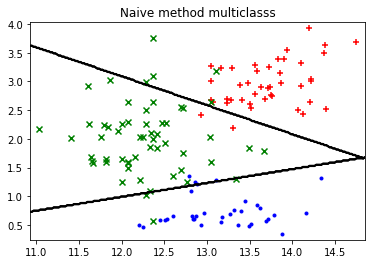

In [62]:
def predict_multi(X, theta):
    X = np.c_[np.ones((len(X), 1)), X]
    return (np.argmax(softmax(theta, X), axis = 1)).astype(int)

plot_boundary(Xtrain, lambda x: predict_multi(x, W), "Naive method multiclasss")
plot_points(Xtrain, ytrain.argmax(axis=1))

In [51]:
W_newton = MultiClassLogRegTrainNewton(Xtrain, ytrain)

Iteration :  0 Error -LLK :  1.0986122886681098  Error MSE : 9.416297927883708
Iteration :  1 Error -LLK :  0.26072003685467554  Error MSE : 4.103587904914616
Iteration :  2 Error -LLK :  0.1958948894183179  Error MSE : 3.7456174703015646
Iteration :  3 Error -LLK :  0.16950238656531275  Error MSE : 3.6432379996909026
Iteration :  4 Error -LLK :  0.16225348726312927  Error MSE : 3.658417409505118
Iteration :  5 Error -LLK :  0.16145332325348055  Error MSE : 3.6691699581100523
Iteration :  6 Error -LLK :  0.16143214702611752  Error MSE : 3.6762469947571126
Iteration :  7 Error -LLK :  0.16143193197441844  Error MSE : 3.6726410885242147
Iteration :  8 Error -LLK :  0.16143180605453122  Error MSE : 3.676400887107032
Iteration :  9 Error -LLK :  0.16143172514128862  Error MSE : 3.672700538188261
Iteration :  10 Error -LLK :  0.16143160606827997  Error MSE : 3.676358537743202
Iteration :  11 Error -LLK :  0.16143152838918834  Error MSE : 3.672736334318134
Iteration :  12 Error -LLK :  0.161

Iteration :  197 Error -LLK :  0.1614270079054891  Error MSE : 3.674177507369181
Iteration :  198 Error -LLK :  0.16142700589406175  Error MSE : 3.674801101004961
Iteration :  199 Error -LLK :  0.16142700383963923  Error MSE : 3.6741828487071433
Iteration :  200 Error -LLK :  0.16142700190902068  Error MSE : 3.674795736005242
Iteration :  201 Error -LLK :  0.16142699993242185  Error MSE : 3.6741880868830896
Iteration :  202 Error -LLK :  0.16142699807923652  Error MSE : 3.6747904762337695
Iteration :  203 Error -LLK :  0.16142699617741876  Error MSE : 3.674193223963856
Iteration :  204 Error -LLK :  0.16142699439843408  Error MSE : 3.6747853195145797
Iteration :  205 Error -LLK :  0.16142699256847395  Error MSE : 3.674198261974946
Iteration :  206 Error -LLK :  0.1614269908605951  Error MSE : 3.674780263718065
Iteration :  207 Error -LLK :  0.16142698909968392  Error MSE : 3.6742032029013396
Iteration :  208 Error -LLK :  0.16142698745994732  Error MSE : 3.674775306759955
Iteration :  

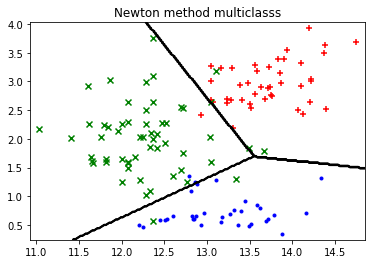

In [52]:
plot_boundary(Xtrain, lambda x: predict_multi(x, W_newton), "Newton method multiclasss")
plot_points(Xtrain, ytrain.argmax(axis=1))

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

predictions = predict_multi(Xtest, W) + 1
print("Prediction with naive logistic regression")
print(' Accuracy:', accuracy_score(ytest, predictions))
print(' Precision:', precision_score(ytest, predictions, average='macro'))
print(' Recall:', recall_score(ytest, predictions, average='macro'))
print("--")

predictions = predict_multi(Xtest, W_newton) + 1
print("Prediction with newthod method")
print(' Accuracy:', accuracy_score(ytest, predictions))
print(' Precision:', precision_score(ytest, predictions, average='macro'))
print(' Recall:', recall_score(ytest, predictions, average='macro'))


Prediction with naive logistic regression
 Accuracy: 0.8
 Precision: 0.8217592592592592
 Recall: 0.798015873015873
--
Prediction with newthod method
 Accuracy: 0.8444444444444444
 Precision: 0.8657407407407408
 Recall: 0.8424603174603175


# Regularization

Next, we want to include all the features from the data set.  

In [64]:
X = data.drop('class', 1).as_matrix()
y = data.as_matrix(columns=['class'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
ytrain = label_binarize(ytrain, [1, 2, 3])
Xtrain_normalize = preprocessing.normalize(Xtrain, axis = 0)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Because we are now significantly increasing the number of features, we apply regularisation  as part of new cost and gradient functions.  As we have seen with linear regression, regularization prevents overfitting, a situation where a large number of features allows the classifier to fit the training set *too* exactly, meaning that it fails to generalize well and perform accurately on data it hasn't yet seen.

To avoid this problem, we add an additional term to the cost function

$$
J(\theta) =-\frac{1}{N}[\sum_{i=1}^{N}(y^{i}\log(f_\theta(x^{i})))]+ \frac{\lambda}{2}\|\theta\|_2^2
$$

- Compute the partiel derivatives of $J(\theta)$ and define the update formula of the gradient descent algorithm?

$$
\frac{dJ(\theta)}{d\theta} =\frac{1}{N}[\sum_{i=1}^{N}(f_\theta(x^{i}) - y^{i})x^{i}] + \lambda\ \theta
$$

Here we have 13 features, then the exponentiation in the softmax can explode. A nice way to avoid this problem is by substract for each example the max with all the other values

$$
S_j=\frac{e^{a_j-max(a_1, a_2, \cdots, a_N)}}{\sum_{k=1}^{N}e^{a_k-max(a_1, a_2, \cdots, a_N)}}
$$

- Write a function that minimize $J(\theta)$ and test it on the WINE dataset?

In [65]:
def softmax(w, x, axis=-1):
    z = x @ w
    xrel = z - z.max(axis=axis, keepdims=True)
    exp_xrel = np.exp(xrel)
    return exp_xrel / exp_xrel.sum(axis=axis, keepdims=True)  

def cost_function_regularizer(y, yhat, theta, lambd):
    return -(1/len(yhat)) * ((np.sum(y * np.ma.log(yhat).filled(0))) + ((lambd/2) * np.sum(theta**2)))

def RegularizerLogRegTrain(x, y, num_epochs, learning_rate, lambd):
    N = x.shape[0]
    x = np.c_[np.ones((N,1)), x]
    d = x.shape[1]
    K = y.shape[1]
    w = np.zeros((d, K))
    print(w.shape)
    for i in range(num_epochs):
        yhat = softmax(w, x)
        cost = cost_function_regularizer(y, yhat, w, lambd)
        error = yhat - y
        if i % 1000 == 0:
            print('Iteration:', i, '| Error -LLK:', cost, '| Error MSE :', np.linalg.norm(error))
        dj = ((x.T @ error) / N) + lambd*w
        w = w - learning_rate * dj
    return w

In [75]:
W_newton = RegularizerLogRegTrain(Xtrain, ytrain, 100000, 0.00001, 3)
W_newton

(14, 3)
Iteration: 0 | Error -LLK: 1.0986122886681098 | Error MSE : 9.416297927883708
Iteration: 1000 | Error -LLK: 0.6795872758143257 | Error MSE : 7.353798460531467
Iteration: 2000 | Error -LLK: 0.6476187459900056 | Error MSE : 7.204031781204301
Iteration: 3000 | Error -LLK: 0.6300256598238877 | Error MSE : 7.103770646138542
Iteration: 4000 | Error -LLK: 0.6165176524665762 | Error MSE : 7.018589607377085
Iteration: 5000 | Error -LLK: 0.6049169233012881 | Error MSE : 6.941519591190378
Iteration: 6000 | Error -LLK: 0.5945046816447573 | Error MSE : 6.870208253044315
Iteration: 7000 | Error -LLK: 0.58497345418206 | Error MSE : 6.803587860023545
Iteration: 8000 | Error -LLK: 0.5761629077249824 | Error MSE : 6.741057407120393
Iteration: 9000 | Error -LLK: 0.5679745591676613 | Error MSE : 6.682218250644683
Iteration: 10000 | Error -LLK: 0.5603395374452269 | Error MSE : 6.626772095340017
Iteration: 11000 | Error -LLK: 0.5532049215597479 | Error MSE : 6.574476346405308
Iteration: 12000 | Erro

array([[-0.00355551,  0.0052525 , -0.00169699],
       [-0.02794976,  0.02883096, -0.00088119],
       [ 0.00058208, -0.03531369,  0.03473161],
       [-0.00374942,  0.00160871,  0.00214072],
       [-0.10972176,  0.0671147 ,  0.04260706],
       [-0.03488729,  0.02421764,  0.01066965],
       [ 0.00597066,  0.02028385, -0.02625451],
       [ 0.01906947,  0.03404646, -0.05311592],
       [-0.00321264,  0.0009791 ,  0.00223353],
       [ 0.00408767,  0.01501089, -0.01909856],
       [-0.01542311, -0.1117875 ,  0.12721061],
       [-0.00136916,  0.01619695, -0.01482779],
       [ 0.00872353,  0.037354  , -0.04607753],
       [ 0.00778528, -0.00472205, -0.00306323]])

In [76]:
predictions = predict_multi(Xtest, W_newton) + 1
print('accuracy:', accuracy_score(ytest, predictions))
print('precision:', precision_score(ytest, predictions, average='macro'))
print('recall:', recall_score(ytest, predictions, average='macro'))

accuracy: 0.8444444444444444
precision: 0.9135802469135802
recall: 0.8203463203463204
